<a href="https://colab.research.google.com/github/avi26-git/ML/blob/master/Credit%20Card%20Approval%20Predictor/Credit%20Card%20Approval%20Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Automatic Credit Card Approval Prediction**

---



Credit card applications get rejected many times because of various reasons. e.g., high loan balances, low income levels or fault payments.
This can be a mundane, time taking and error prone task for humans, here we'll use machine learning to automate this process.
The dataset that would be used is : [Credit Card Approval dataset](http://archive.ics.uci.edu/ml/datasets/credit+approval) from the UCI Machine Learning Repository.

The structure of this notebook would be:


1.   Loading and viewing the dataset.
2.   Data preprocessing.
3.   EDA.
4.   ML Model.



## 1. Loading and viewing data.



### Importing necessary libraries

In [5]:
#Importing necessary libraries
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

# Load dataset
cc_apps = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data", header=None)

#printing first 5 lines
print(cc_apps.head())

  0      1   2  3  4  5  6   7  8  9   10 11 12     13   14 15
0  b  30.83 0.0  u  g  w  v 1.2  t  t   1  f  g  00202    0  +
1  a  58.67 4.5  u  g  q  h 3.0  t  t   6  f  g  00043  560  +
2  a  24.50 0.5  u  g  q  h 1.5  t  f   0  f  g  00280  824  +
3  b  27.83 1.5  u  g  w  v 3.8  t  t   5  t  g  00100    3  +
4  b  20.17 5.6  u  g  w  v 1.7  t  f   0  f  s  00120    0  +


###**Exploratory Analysis and Data Transformations**

A review of the [codebook](http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names) shows that all of the values in the dataset have been converted to meaningless symbols to protect the confidentiality of the data.

The probable features in a typical credit card application are Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income and finally the ApprovalStatus.

In [6]:
# Print summary statistics
cc_apps_description = cc_apps.describe()
print(cc_apps_description)

print("\n")

# Print DataFrame information
cc_apps_info = cc_apps.info()
print(cc_apps_info)

print("\n")

# Inspect missing values in the dataset
cc_apps.tail(17)

         2     7     10       14
count 690.0 690.0 690.0    690.0
mean    4.8   2.2   2.4   1017.4
std     5.0   3.3   4.9   5210.1
min     0.0   0.0   0.0      0.0
25%     1.0   0.2   0.0      0.0
50%     2.8   1.0   0.0      5.0
75%     7.2   2.6   3.0    395.5
max    28.0  28.5  67.0 100000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     690 non-null object
1     690 non-null object
2     690 non-null float64
3     690 non-null object
4     690 non-null object
5     690 non-null object
6     690 non-null object
7     690 non-null float64
8     690 non-null object
9     690 non-null object
10    690 non-null int64
11    690 non-null object
12    690 non-null object
13    690 non-null object
14    690 non-null int64
15    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB
None




,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
673,?,29.50,2.0,y,p,e,h,2.0,f,f,0,f,g,00256,17,-
674,a,37.33,2.5,u,g,i,h,0.2,f,f,0,f,g,00260,246,-
675,a,41.58,1.0,u,g,aa,v,0.7,f,f,0,f,g,00240,237,-
676,a,30.58,10.7,u,g,q,h,0.1,f,t,12,t,g,00129,3,-
677,b,19.42,7.2,u,g,m,v,0.0,f,t,1,f,g,00100,1,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.1,y,p,e,h,1.2,f,f,0,f,g,00260,0,-
686,a,22.67,0.8,u,g,c,v,2.0,f,t,2,t,g,00200,394,-
687,a,25.25,13.5,y,p,ff,ff,2.0,f,t,1,t,g,00200,1,-
688,b,17.92,0.2,u,g,aa,v,0.0,f,f,0,f,g,00280,750,-


It's visible that the dataset has a mixture of numerical and non-numerical features. This has to be fixed with preprocessing.
e.g., Values in Approved are ‘+’ or ‘-’ for whether credit had been granted or not. These character symbols aren’t meaningful as is so will need to be transformed. Turning the ‘+’ to a ‘1’ and the ‘-’ to a ‘0’ will help with classification and logistic regression models later in the analysis.

We’ll need to do additional transformations such as filling in missing values. That process begins by first identifying which values are missing and then determining the best way to address them. We can remove them, zero them out, or estimate a plug value. A scan through the dataset shows that missing values are labeled with ‘?’

#### **Handling Missing Values**


Replace the missing values with NaN for now.

In [7]:
# Inspect missing values in the dataset
print(cc_apps.isnull().values.sum())

# Replace the '?'s with NaN
cc_apps = cc_apps.replace("?",np.NaN)

# Inspect the missing values again
cc_apps.tail(17)

0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
673,NaN,29.50,2.0,y,p,e,h,2.0,f,f,0,f,g,00256,17,-
674,a,37.33,2.5,u,g,i,h,0.2,f,f,0,f,g,00260,246,-
675,a,41.58,1.0,u,g,aa,v,0.7,f,f,0,f,g,00240,237,-
676,a,30.58,10.7,u,g,q,h,0.1,f,t,12,t,g,00129,3,-
677,b,19.42,7.2,u,g,m,v,0.0,f,t,1,f,g,00100,1,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.1,y,p,e,h,1.2,f,f,0,f,g,00260,0,-
686,a,22.67,0.8,u,g,c,v,2.0,f,t,2,t,g,00200,394,-
687,a,25.25,13.5,y,p,ff,ff,2.0,f,t,1,t,g,00200,1,-
688,b,17.92,0.2,u,g,aa,v,0.0,f,f,0,f,g,00280,750,-


If we ignore the missing values, our machine learning model may miss out on information about the dataset that may be useful for its training. Then, there are many models such as LDA,  which cannot handle missing values implicitly.

These missing values can be replaced with the mean values for that column- mean imputation.

In [8]:
# Impute the missing values with mean imputation
cc_apps = cc_apps.fillna(cc_apps.mean())

# Count the number of NaNs in the dataset to verify
print(cc_apps.isnull().values.sum())

67


In [9]:
cc_apps.columns =['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity',
                  'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen',
                  'ZipCode', 'Income','ApprovalStatus']

#setting columns headers
cc_apps

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.0,u,g,w,v,1.2,t,t,1,f,g,00202,0,+
1,a,58.67,4.5,u,g,q,h,3.0,t,t,6,f,g,00043,560,+
2,a,24.50,0.5,u,g,q,h,1.5,t,f,0,f,g,00280,824,+
3,b,27.83,1.5,u,g,w,v,3.8,t,t,5,t,g,00100,3,+
4,b,20.17,5.6,u,g,w,v,1.7,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.1,y,p,e,h,1.2,f,f,0,f,g,00260,0,-
686,a,22.67,0.8,u,g,c,v,2.0,f,t,2,t,g,00200,394,-
687,a,25.25,13.5,y,p,ff,ff,2.0,f,t,1,t,g,00200,1,-
688,b,17.92,0.2,u,g,aa,v,0.0,f,f,0,f,g,00280,750,-


The code above takes care of the missing values present in numeric columns but non-numeric columns 0,1,3,4,5,6 and 13 still have missing values.

We are going to impute these missing values with the most frequent values as present in the respective columns. This is good practice when it comes to imputing missing values for categorical data in general.

More on handling categorical data text [here](https://www.datacamp.com/community/tutorials/categorical-data#categorical)

In [10]:
# Iterate over each column of cc_apps
print(cc_apps.info())
for col in cc_apps.columns:
    # Check if the column is of object type
    if cc_apps[col].dtypes == 'object':
        # Impute with the most frequent value
        cc_apps[col] = cc_apps[col].fillna(cc_apps[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
print(cc_apps.isnull().values.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Gender            678 non-null object
Age               678 non-null object
Debt              690 non-null float64
Married           684 non-null object
BankCustomer      684 non-null object
EducationLevel    681 non-null object
Ethnicity         681 non-null object
YearsEmployed     690 non-null float64
PriorDefault      690 non-null object
Employed          690 non-null object
CreditScore       690 non-null int64
DriversLicense    690 non-null object
Citizen           690 non-null object
ZipCode           677 non-null object
Income            690 non-null int64
ApprovalStatus    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB
None
0


In [11]:
cc_apps

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.0,u,g,w,v,1.2,t,t,1,f,g,00202,0,+
1,a,58.67,4.5,u,g,q,h,3.0,t,t,6,f,g,00043,560,+
2,a,24.50,0.5,u,g,q,h,1.5,t,f,0,f,g,00280,824,+
3,b,27.83,1.5,u,g,w,v,3.8,t,t,5,t,g,00100,3,+
4,b,20.17,5.6,u,g,w,v,1.7,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.1,y,p,e,h,1.2,f,f,0,f,g,00260,0,-
686,a,22.67,0.8,u,g,c,v,2.0,f,t,2,t,g,00200,394,-
687,a,25.25,13.5,y,p,ff,ff,2.0,f,t,1,t,g,00200,1,-
688,b,17.92,0.2,u,g,aa,v,0.0,f,f,0,f,g,00280,750,-


#### **Convert non-numeric data to numeric**

Let's use label encoding to do so.

In [12]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in cc_apps.columns:
    # Compare if the dtype is object
    if cc_apps[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        cc_apps[col]=le.fit_transform(cc_apps[col])
      
      
cc_apps

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,1,156,0.0,1,0,12,7,1.2,1,1,1,0,0,68,0,0
1,0,328,4.5,1,0,10,3,3.0,1,1,6,0,0,11,560,0
2,0,89,0.5,1,0,10,3,1.5,1,0,0,0,0,96,824,0
3,1,125,1.5,1,0,12,7,3.8,1,1,5,1,0,31,3,0
4,1,43,5.6,1,0,12,7,1.7,1,0,0,0,2,37,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,52,10.1,2,2,4,3,1.2,0,0,0,0,0,90,0,1
686,0,71,0.8,1,0,1,7,2.0,0,1,2,1,0,67,394,1
687,0,97,13.5,2,2,5,2,2.0,0,1,1,1,0,67,1,1
688,1,20,0.2,1,0,0,7,0.0,0,0,0,0,0,96,750,1


**Notes:** 
1. Features where the categories are only labeled without any order of precedence are called nominal features.
Features which have some order associated with them are called ordinal features. For example, a feature like economic status, with three categories: low, medium and high, which have an order associated with them.

2. Depending on the data, label encoding introduces a new problem. For example, we have encoded a set of country names into numerical data. This is actually categorical data and there is no relation, of any kind, between the rows.
The problem here is, since there are different numbers in the same column, the model will misunderstand the data to be in some kind of order, 0 < 1 < 2. But this isn’t the case at all. To overcome this problem, we use **One Hot Encoder**.
What one hot encoding does is, it takes a column which has categorical data, which has been label encoded, and then splits the column into multiple columns. The numbers are replaced by 1s and 0s, depending on which column has what value.

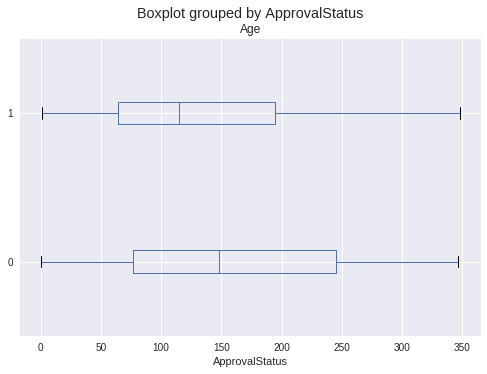

In [13]:
#ages in chars have been converted to numerics, can be handled differently.
col_names = cc_apps.columns

cc_apps.boxplot(column=['Age'],by='ApprovalStatus', vert=False)

###Scale the feature values to a uniform range.



Also features like DriversLicense and ZipCode are not as important as the other features in the dataset for predicting credit card approvals.
(Check using visual techniques)



In [0]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Drop features 10 and 13 and convert the DataFrame to a NumPy array
cc_apps = cc_apps.drop([cc_apps.columns[10],cc_apps.columns[13]], axis=1)
cc_apps = cc_apps.values

# Segregate features and labels into separate variables
X,y = cc_apps[:,0:13], cc_apps[:,13]


# Instantiate MinMaxScaler and use it to rescale
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)

###Splitting the dataset into train, validate and test sets

In [0]:
from sklearn.model_selection import train_test_split

# sets the test set to be 20%
X_train, X_test, y_train, y_test = train_test_split(rescaledX, y, test_size=0.2, random_state=1)

# sets the final train set to be 64% and the validation set to be 16%
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

###Fitting a logistic regression model to the train set

Since, the prediction will be a class(approved or denied, here), this is a classification problem

In [17]:

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

###Making predictions and evaluating performance

In [19]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(X_val)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(X_val, y_val))

# Print the confusion matrix of the logreg model
# ... YOUR CODE FOR TASK 10 ...
confusion_matrix(y_val, y_pred)

Accuracy of logistic regression classifier:  0.8468468468468469


array([[52,  3],
       [14, 42]])

###Grid searching and making the model perform better

Grid search is an approach to parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid.

In [20]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)
print(param_grid)

{'tol': [0.01, 0.001, 0.0001], 'max_iter': [100, 150, 200]}


###Finding the best performing model

We have defined the grid of hyperparameter values and converted them into a single dictionary format which GridSearchCV() expects as one of its parameters. Now, we will begin the grid search to see which values perform best.

We will instantiate GridSearchCV() with our earlier logreg model with all the data we have. Instead of passing train and test sets, we will supply rescaledX and y. We will also instruct GridSearchCV() to perform a cross-validation of five folds.

In [21]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_,grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.855072 using {'max_iter': 100, 'tol': 0.01}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Having not even used the test set as of now, there are a lot of tuning opportunities in this. Will be branching to include those!